# Product Amount Forecast by Time

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

## Import Libraries

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Indest Data

In [87]:
df = pd.read_csv("../3- RNN_ Time_Series_Frozen_dessert/Frozen_Dessert_Production.csv",
                 index_col=0,
                 parse_dates=True)

In [88]:
df

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [89]:
df.rename(columns={"IPN31152N": "Production"}, inplace=True)
# df.index = df.iloc[:,0]
# df.index

In [90]:
df.head()

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Production  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [92]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Production,573.000,109.896,27.951,58.660,88.936,107.643,128.278,196.174


In [93]:
df.shape

(573, 1)

In [94]:
df.duplicated().sum()

0

In [95]:
df.nunique()

Production    573
dtype: int64

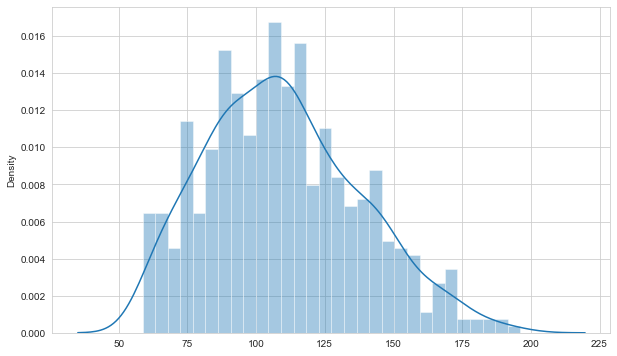

In [96]:
sns.distplot(df, bins = 30);

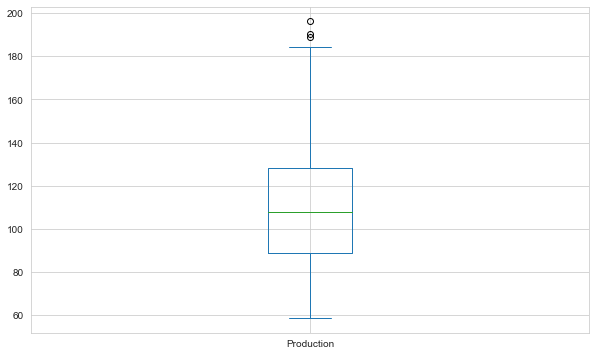

In [97]:
df.plot(kind = 'box');

In [98]:
df.tail(60)

,Production
DATE,
2014-10-01,91.261
2014-11-01,86.572
2014-12-01,75.375
2015-01-01,85.577
2015-02-01,100.558
2015-03-01,109.579
2015-04-01,108.362
2015-05-01,106.058
2015-06-01,116.138


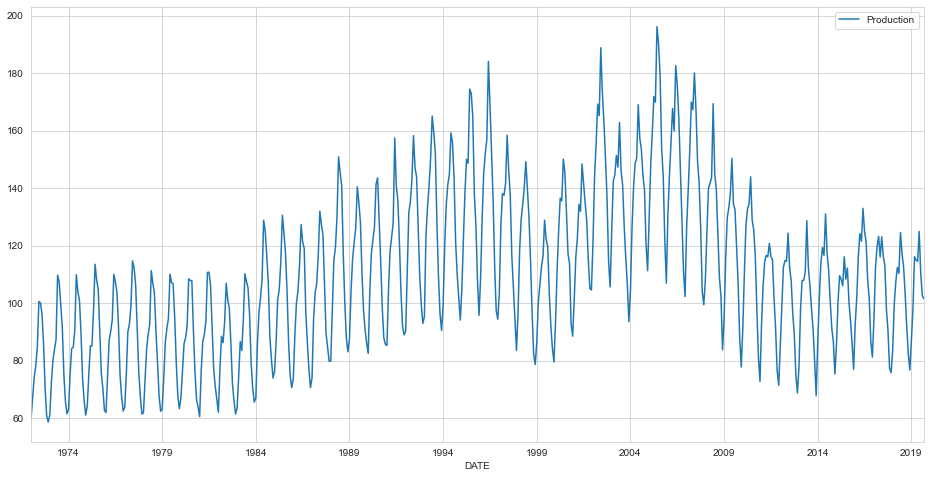

In [99]:
df.plot(figsize=(16,8));

## Preprocessing of Data

### Train Test Split

In [100]:
len(df)

573

In [101]:
test_size = 60

In [102]:
test_ind = len(df)- test_size
test_ind

513

In [103]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [104]:
train

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2014-05-01,116.631
2014-06-01,131.040
2014-07-01,117.272


In [105]:
test

,Production
DATE,
2014-10-01,91.261
2014-11-01,86.572
2014-12-01,75.375
2015-01-01,85.577
2015-02-01,100.558
2015-03-01,109.579
2015-04-01,108.362
2015-05-01,106.058
2015-06-01,116.138


### Scaling

In [106]:
from sklearn.preprocessing import MinMaxScaler

In [107]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [108]:
from tensorflow import keras 
from keras import preprocessing  
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [218]:
length = 48
batch_size = 32
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [110]:
len(generator)

15

In [111]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         ...,
         [0.12405219],
         [0.08404241],
         [0.02969736]],
 
        [[0.06108982],
         [0.11326273],
         [0.14145625],
         ...,
         [0.08404241],
         [0.02969736],
         [0.02386668]],
 
        [[0.11326273],
         [0.14145625],
         [0.18982663],
         ...,
         [0.02969736],
         [0.02386668],
         [0.11198795]],
 
        ...,
 
        [[0.37263651],
         [0.32891584],
         [0.30809031],
         ...,
         [0.1837756 ],
         [0.2210642 ],
         [0.24573807]],
 
        [[0.32891584],
         [0.30809031],
         [0.22409662],
         ...,
         [0.2210642 ],
         [0.24573807],
         [0.38298674]],
 
        [[0.30809031],
         [0.22409662],
         [0.10933731],
         ...,
         [0.24573807],
         [0.38298674],
         [0.35098488]]]),
 array([[0.02386668],
        [0.11198795],
        [0.

In [112]:
X, y = generator[0]

In [113]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 ... 0.24573807 0.38298674 0.35098488]
Predict this y: 
 [[0.02386668]
 [0.11198795]
 [0.20583228]
 [0.22885832]
 [0.258115  ]
 [0.37353242]
 [0.35488703]
 [0.32839226]
 [0.24418041]
 [0.11957773]
 [0.06451857]
 [0.02780228]
 [0.0371497 ]
 [0.11927158]
 [0.22805913]
 [0.24728191]
 [0.29422626]
 [0.40769115]
 [0.39028709]
 [0.34726599]
 [0.24042588]
 [0.12627596]
 [0.06351285]
 [0.0202285 ]
 [0.02347545]
 [0.10334519]
 [0.1837756 ]
 [0.2210642 ]
 [0.24573807]
 [0.38298674]
 [0.35098488]
 [0.32746581]]


## Modelling & Model Performance

### Import related libraries

In [219]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM , Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [115]:
train_scaled.shape

(513, 1)

In [116]:
n_features = train_scaled.shape[1]

In [208]:
from tensorflow import keras
from keras import optimizers
optimizer=keras.optimizers.Adam(learning_rate=0.001)

In [221]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features))) # return_sequences=True 2 tane RNN ard arda göndereceksem bunu true yap
model.add(LSTM(50, activation = 'tanh', return_sequences=True ))
model.add(Dense(1))
model.compile(optimizer = optimizer, loss = 'mse')

In [222]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 48, 100)           40800     
                                                                 
 lstm_29 (LSTM)              (None, 50)                30200     
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [223]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [224]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [225]:
model.fit_generator(generator,
                    epochs = 30,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/30
15/15 [==============================] - 8s 221ms/step - loss: 0.0599 - val_loss: 0.0201
Epoch 2/30
15/15 [==============================] - 1s 63ms/step - loss: 0.0334 - val_loss: 0.0119
Epoch 3/30
15/15 [==============================] - 1s 64ms/step - loss: 0.0323 - val_loss: 0.0226
Epoch 4/30
15/15 [==============================] - 1s 59ms/step - loss: 0.0239 - val_loss: 0.0106
Epoch 5/30
15/15 [==============================] - 1s 56ms/step - loss: 0.0206 - val_loss: 0.0084
Epoch 6/30
15/15 [==============================] - 1s 64ms/step - loss: 0.0122 - val_loss: 0.0025
Epoch 7/30
15/15 [==============================] - 1s 58ms/step - loss: 0.0060 - val_loss: 0.0026
Epoch 8/30
15/15 [==============================] - 1s 65ms/step - loss: 0.0058 - val_loss: 0.0035
Epoch 9/30
15/15 [==============================] - 1s 59ms/step - loss: 0.0057 - val_loss: 0.0021
Epoch 10/30
15/15 [==============================] - 1s 58ms/step - loss: 0.0035 - val_loss: 0.0023
Epoch 11

<AxesSubplot:>

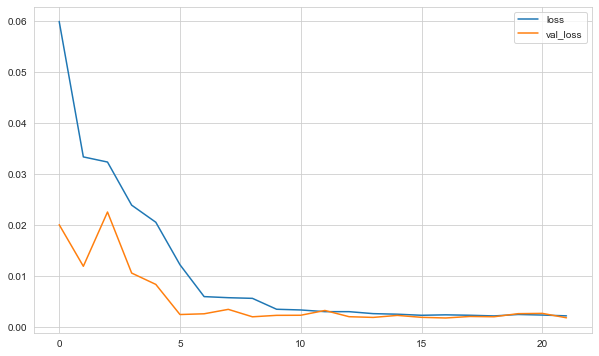

In [226]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#### Evaluate on Test Data

In [227]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [228]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [229]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [230]:
predictions_scaled


[array([0.19892848], dtype=float32),
 array([0.14301133], dtype=float32),
 array([0.15497994], dtype=float32),
 array([0.21896636], dtype=float32),
 array([0.29859063], dtype=float32),
 array([0.3698776], dtype=float32),
 array([0.42575535], dtype=float32),
 array([0.46376646], dtype=float32),
 array([0.47710928], dtype=float32),
 array([0.45545778], dtype=float32),
 array([0.39296508], dtype=float32),
 array([0.29808652], dtype=float32),
 array([0.2005176], dtype=float32),
 array([0.14392899], dtype=float32),
 array([0.15511583], dtype=float32),
 array([0.21890977], dtype=float32),
 array([0.29896417], dtype=float32),
 array([0.37087265], dtype=float32),
 array([0.42734876], dtype=float32),
 array([0.46600294], dtype=float32),
 array([0.48011708], dtype=float32),
 array([0.45930752], dtype=float32),
 array([0.39758614], dtype=float32),
 array([0.30302113], dtype=float32),
 array([0.20486334], dtype=float32),
 array([0.14679492], dtype=float32),
 array([0.1564669], dtype=float32),
 arr

In [231]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.8056506561991642 
mae: 0.03901090953343 
mse: 0.0023538877203877523 
rmse: 0.04851688077759897


#### Inverse Transformations and Comparing

In [232]:
predictions = scaler.inverse_transform(predictions_scaled)

In [233]:
compare = test[:48]

In [234]:
compare['Predictions'] = predictions

In [235]:
compare

,Production,Predictions
DATE,,
2014-10-01,91.261,86.015
2014-11-01,86.572,78.326
2014-12-01,75.375,79.972
2015-01-01,85.577,88.771
2015-02-01,100.558,99.720
2015-03-01,109.579,109.523
2015-04-01,108.362,117.207
2015-05-01,106.058,122.434
2015-06-01,116.138,124.269


<AxesSubplot:xlabel='DATE'>

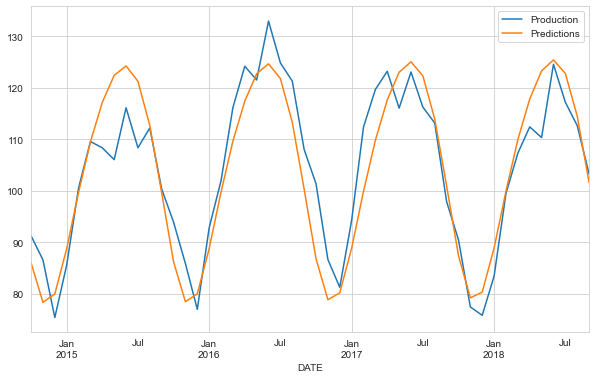

In [236]:
compare.plot()

#### Calculation R2 Score and Error Metrics

In [237]:
eval_metrics(compare.Production, compare.Predictions)

r2_score: 0.8056506561991642 
mae: 5.36454231248914 
mse: 44.51218790418678 
rmse: 6.6717454915626675


### with "relu" activation function

In [272]:
model = Sequential()
model.add(LSTM(128, activation = 'relu', return_sequences=True, input_shape = (length, n_features))) # return_sequences=True 2 tane RNN ard arda göndereceksem bunu true yap
model.add(LSTM(128, activation = 'relu', return_sequences=True ))
model.add(Dense(1))
model.compile(optimizer = optimizer, loss = 'mse')

In [274]:
model.fit_generator(generator,
                    epochs = 100,
                    validation_data = validation_generator)
                    # callbacks = [early_stop])

Epoch 1/100
15/15 [==============================] - 1s 91ms/step - loss: 0.0255 - val_loss: 0.0186
Epoch 2/100
15/15 [==============================] - 1s 85ms/step - loss: 0.0267 - val_loss: 0.0154
Epoch 3/100
15/15 [==============================] - 1s 92ms/step - loss: 0.0257 - val_loss: 0.0153
Epoch 4/100
15/15 [==============================] - 1s 85ms/step - loss: 0.0254 - val_loss: 0.0166
Epoch 5/100
15/15 [==============================] - 1s 90ms/step - loss: 0.0254 - val_loss: 0.0136
Epoch 6/100
15/15 [==============================] - 1s 87ms/step - loss: 0.0252 - val_loss: 0.0181
Epoch 7/100
15/15 [==============================] - 1s 96ms/step - loss: 0.0266 - val_loss: 0.0139
Epoch 8/100
15/15 [==============================] - 1s 90ms/step - loss: 0.0246 - val_loss: 0.0161
Epoch 9/100
15/15 [==============================] - 1s 88ms/step - loss: 0.0244 - val_loss: 0.0125
Epoch 10/100
15/15 [==============================] - 1s 97ms/step - loss: 0.0265 - val_loss: 0.0168

<AxesSubplot:>

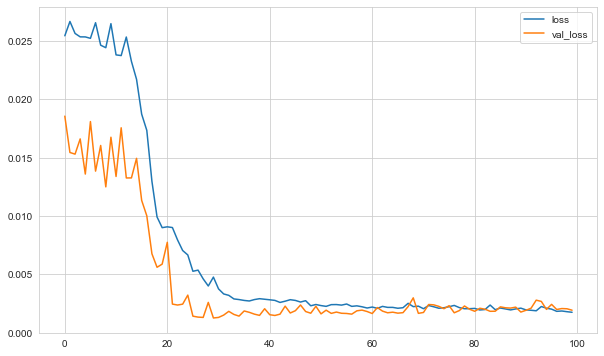

In [275]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#### Evaluate on Test Data

In [276]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [277]:
predictions_scaled

[array([0.1771758], dtype=float32),
 array([0.12278777], dtype=float32),
 array([0.14578314], dtype=float32),
 array([0.22639236], dtype=float32),
 array([0.31151038], dtype=float32),
 array([0.3626408], dtype=float32),
 array([0.41145122], dtype=float32),
 array([0.46020544], dtype=float32),
 array([0.47148436], dtype=float32),
 array([0.43571952], dtype=float32),
 array([0.3588676], dtype=float32),
 array([0.25417516], dtype=float32),
 array([0.15119085], dtype=float32),
 array([0.10096413], dtype=float32),
 array([0.13165066], dtype=float32),
 array([0.2148574], dtype=float32),
 array([0.30000636], dtype=float32),
 array([0.3500727], dtype=float32),
 array([0.39971182], dtype=float32),
 array([0.44828787], dtype=float32),
 array([0.45935342], dtype=float32),
 array([0.42302135], dtype=float32),
 array([0.34609953], dtype=float32),
 array([0.24142078], dtype=float32),
 array([0.13942973], dtype=float32),
 array([0.09307168], dtype=float32),
 array([0.12724389], dtype=float32),
 array

In [278]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.6111292233088375 
mae: 0.05638300111519368 
mse: 0.0047098597204887445 
rmse: 0.06862841773266191


#### Inverse Transformations and Comparing

In [279]:
predictions = scaler.inverse_transform(predictions_scaled)

In [280]:
compare_r = test[:48]

In [281]:
compare_r['Predictions'] = predictions

In [282]:
compare_r

,Production,Predictions
DATE,,
2014-10-01,91.261,83.024
2014-11-01,86.572,75.545
2014-12-01,75.375,78.707
2015-01-01,85.577,89.792
2015-02-01,100.558,101.497
2015-03-01,109.579,108.528
2015-04-01,108.362,115.240
2015-05-01,106.058,121.944
2015-06-01,116.138,123.495


<AxesSubplot:xlabel='DATE'>

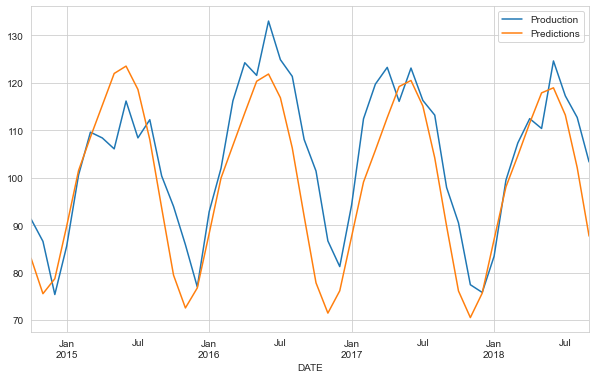

In [283]:
compare_r.plot()

#### Calculation R2 Score and Error Metrics

In [284]:
eval_metrics(compare_r.Production, compare_r.Predictions)

r2_score: 0.6111292233088371 
mae: 7.753446377054639 
mse: 89.063789689264 
rmse: 9.437361373247503


## Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [285]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [286]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [287]:
len(df)

573

In [288]:
len(generator) 

17

In [292]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features))) 
model.add(LSTM(50, activation = 'tanh', return_sequences=True ))
model.add(Dense(1))
model.compile(optimizer = optimizer, loss = 'mse')

model.fit_generator(generator, epochs=30)

Epoch 1/30
17/17 [==============================] - 5s 58ms/step - loss: 0.0732
Epoch 2/30
17/17 [==============================] - 1s 56ms/step - loss: 0.0362
Epoch 3/30
17/17 [==============================] - 1s 54ms/step - loss: 0.0280
Epoch 4/30
17/17 [==============================] - 1s 55ms/step - loss: 0.0284
Epoch 5/30
17/17 [==============================] - 1s 57ms/step - loss: 0.0260
Epoch 6/30
17/17 [==============================] - 1s 51ms/step - loss: 0.0265
Epoch 7/30
17/17 [==============================] - 1s 52ms/step - loss: 0.0172
Epoch 8/30
17/17 [==============================] - 1s 58ms/step - loss: 0.0082
Epoch 9/30
17/17 [==============================] - 1s 54ms/step - loss: 0.0047
Epoch 10/30
17/17 [==============================] - 1s 52ms/step - loss: 0.0044
Epoch 11/30
17/17 [==============================] - 1s 53ms/step - loss: 0.0038
Epoch 12/30
17/17 [==============================] - 1s 58ms/step - loss: 0.0037
Epoch 13/30
17/17 [==================

In [304]:
scaled_full_data.shape

(573, 1)

In [305]:
scaled_full_data[-length:].shape

(48, 1)

In [306]:
forecast = []
# Replace periods with whatever forecast length you want

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [307]:
forecast = scaler.inverse_transform(forecast)

In [308]:
forecast

array([[ 86.21291901],
       [ 79.839215  ],
       [ 79.26836385],
       [ 89.32608478],
       [100.21785566],
       [107.50908859],
       [112.78459305],
       [117.59440293],
       [119.67376468],
       [114.99768016],
       [105.33705348],
       [ 94.87324679],
       [ 85.86751374],
       [ 79.16488141],
       [ 80.07885102],
       [ 91.00902645],
       [101.31900184],
       [108.08859931],
       [113.18323233],
       [117.85850129],
       [119.22961042],
       [113.74976394],
       [103.82579297],
       [ 93.457971  ],
       [ 84.69948233],
       [ 78.48582049],
       [ 80.84986809],
       [ 92.26062903],
       [102.15209077],
       [108.62756211],
       [113.66375841],
       [118.19725718],
       [118.85457697],
       [112.60925422],
       [102.4371516 ],
       [ 92.18580758],
       [ 83.65445326],
       [ 77.98338525],
       [ 81.7791692 ],
       [ 93.4521679 ],
       [102.89120719],
       [109.09452304],
       [114.07845867],
       [118

In [309]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [310]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS') 

In [311]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01',
               '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01',
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
               '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01',
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [326]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [327]:
forecast_df

,Forecast
2019-10-01,86.213
2019-11-01,79.839
2019-12-01,79.268
2020-01-01,89.326
2020-02-01,100.218
2020-03-01,107.509
2020-04-01,112.785
2020-05-01,117.594
2020-06-01,119.674
2020-07-01,114.998


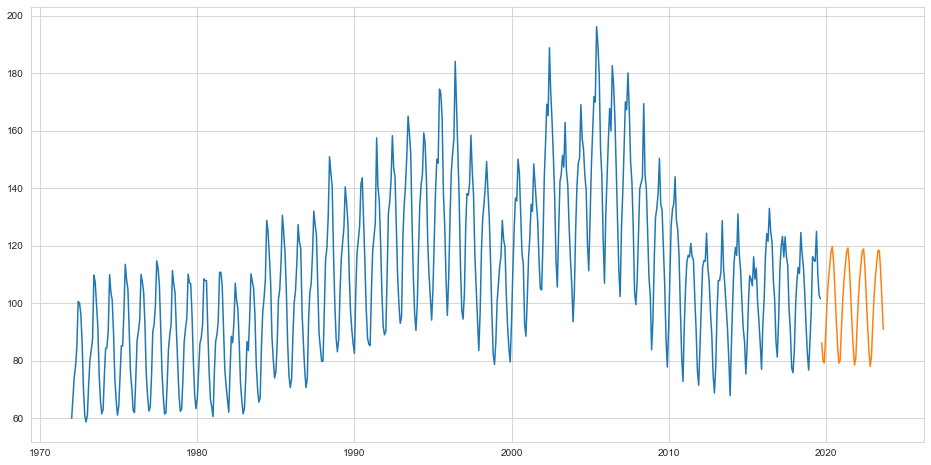

In [329]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Production'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

In [330]:
forecast_df

,Forecast
2019-10-01,86.213
2019-11-01,79.839
2019-12-01,79.268
2020-01-01,89.326
2020-02-01,100.218
2020-03-01,107.509
2020-04-01,112.785
2020-05-01,117.594
2020-06-01,119.674
2020-07-01,114.998


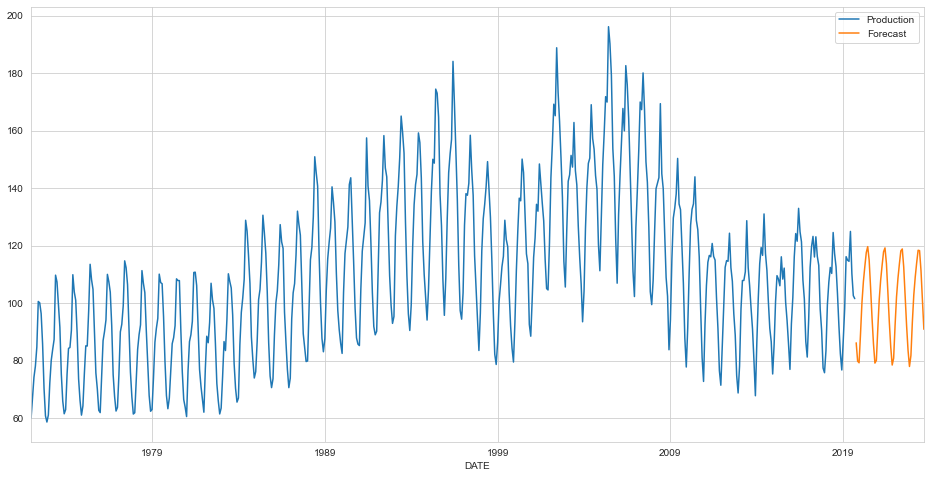

In [316]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8)); 

(576.0, 611.0)

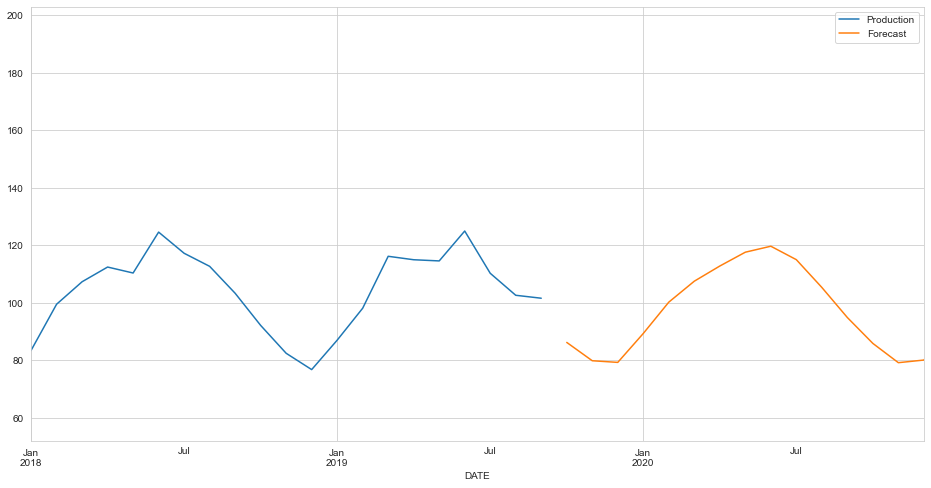

In [331]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01')

<AxesSubplot:>

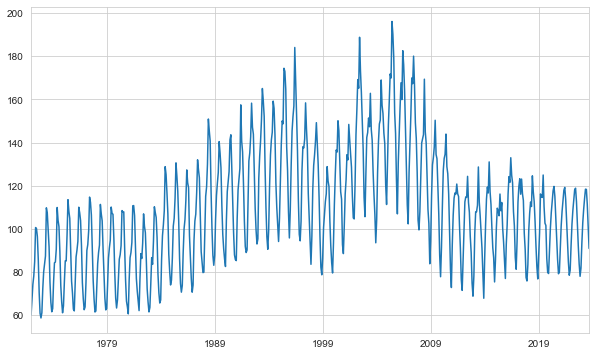

In [332]:
dataset_total = pd.concat((df['Production'], forecast_df['Forecast']), axis=0)
dataset_total.plot()